# Entrenamiento y validación de modelos

In [4]:
# Importar librería para cargar datos procesados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos procesados
df = pd.read_parquet('../../data/processed/COVID19MEXICO_Processed.parquet')

# Inspeccionar las primeras filas de los datos procesados
df.head()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,DEFUNCION,AÑO_ACTUALIZACION,MES_ACTUALIZACION,DIA_ACTUALIZACION,AÑO_INGRESO,MES_INGRESO,DIA_INGRESO,AÑO_SINTOMAS,MES_SINTOMAS,DIA_SINTOMAS
0,2,12,9,2,9,9,9,1,-2,2,...,2,2024,4,23,2023,2,26,2023,2,22
1,2,6,5,1,5,5,28,1,-2,2,...,2,2024,4,23,2023,3,24,2023,3,19
2,1,12,9,1,9,9,12,1,-2,2,...,2,2024,4,23,2023,3,2,2023,3,1
3,2,12,16,2,16,16,41,1,-2,2,...,2,2024,4,23,2023,3,9,2023,3,6
4,2,12,3,1,15,3,3,1,-2,2,...,2,2024,4,23,2023,6,12,2023,6,9


In [94]:
# Importar modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Importar funciones para el entrenamiento y validación de los modelos
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Balance de las clases

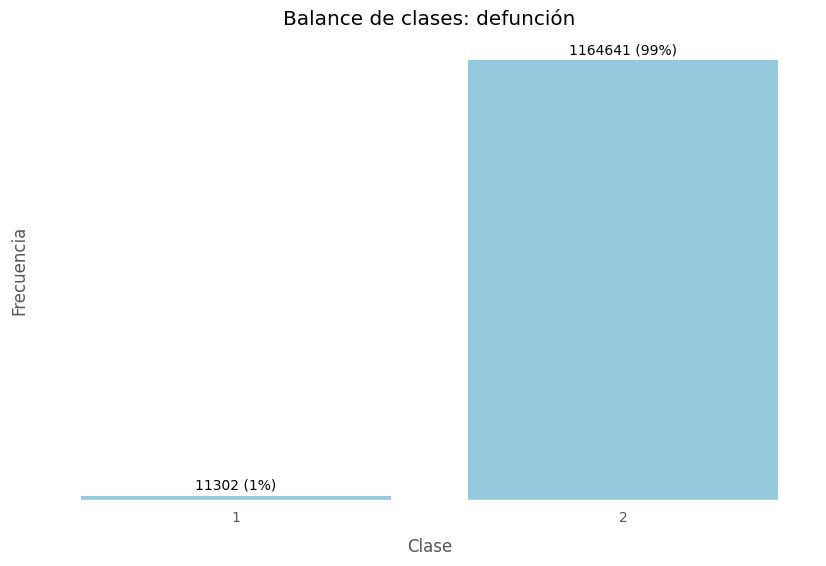

In [5]:
# Customized style
custom_style = {
    'axes.edgecolor': 'white',  # Axis layout color
    'axes.facecolor': 'white',  # Axias face color
    'grid.color': 'white',   # Grid lines color
}

plt.style.use('ggplot')  # Use ggplot as base
plt.rcParams.update(custom_style)  # Apply syle

# Gráfica de barras con seaborn
plt.figure(figsize=(10, 6)) # Tamaño de la figura
ax = sns.countplot(data=df, x='DEFUNCION', color='skyblue') # Gráfica de barras
plt.title('Balance de clases: defunción', pad=10) # Título del gráfico
plt.xlabel('Clase', labelpad=10) # Etiqueta del eje x
plt.ylabel('Frecuencia', labelpad=10) # Etiqueta del eje y

# Desactivar las marcas en el eje x
plt.tick_params(axis='x', which='both', bottom=False, top=False)

# Eliminar los valores del eje y
ax.set_yticks([])

# Anotar los valores de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} ({round(p.get_height()/len(df) *100)}%)', (p.get_x() + p.get_width() / 2., p.get_height() + 10000), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show() # Mostrar gráfico


Hay que tomar medidas para manejar el desbalance de las clases.

### Conjuntos de entrenamiento y validación

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X = df.drop('DEFUNCION', axis=1)  # Características
y = df['DEFUNCION']               # Variable objetivo

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regresión Logística

#### Versión sencilla

In [96]:
# Inicializa el modelo de Regresión Logística
log_regression = LogisticRegression(max_iter=1000)

# Entrena el modelo en los datos de entrenamiento
log_regression.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = log_regression.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0
Confusion Matrix:
 [[149410      0]
 [     0  85779]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    149410
           1       1.00      1.00      1.00     85779

    accuracy                           1.00    235189
   macro avg       1.00      1.00      1.00    235189
weighted avg       1.00      1.00      1.00    235189



#### Versión con ajuste de hiperparámetros

In [14]:
# Definir la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# Inicializar el modelo de Regresión Logística
log_regression = LogisticRegression()

# Inicializar GridSearchCV
grid_search = GridSearchCV(log_regression, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [15]:
# Mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}


In [16]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los datos de prueba
y_pred_best_model = best_model.predict(X_test)

# Accuracy del mejor modelo
accuracy_best_model = accuracy_score(y_test, y_pred_best_model)
print("Accuracy del mejor modelo:", accuracy_best_model)

Exactitud del mejor modelo: 0.6540356904447062


In [17]:
# Matriz de confusión
conf_matrix_best_model = confusion_matrix(y_test, y_pred_best_model)
print("Confusion Matrix del mejor modelo:\n", conf_matrix_best_model)

Confusion Matrix del mejor modelo:
 [[133786  15624]
 [ 65743  20036]]


In [18]:
# Reporte de clasificación
classification_rep_best_model = classification_report(y_test, y_pred_best_model)
print("Classification Report del mejor modelo:\n", classification_rep_best_model)

Classification Report del mejor modelo:
               precision    recall  f1-score   support

           0       0.67      0.90      0.77    149410
           1       0.56      0.23      0.33     85779

    accuracy                           0.65    235189
   macro avg       0.62      0.56      0.55    235189
weighted avg       0.63      0.65      0.61    235189



## Decision Tree

#### Versión sencilla

In [97]:
# Inicializar el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=100, min_samples_leaf=1000)

# Entrenar el modelo en los datos de entrenamiento
decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Calcular y mostrar las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy del árbol de decisión:", accuracy)
print("Matriz de confusión del árbol de decisión:\n", conf_matrix)
print("Informe de clasificación del árbol de decisión:\n", classification_rep)

Accuracy del árbol de decisión: 1.0
Matriz de confusión del árbol de decisión:
 [[149410      0]
 [     0  85779]]
Informe de clasificación del árbol de decisión:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    149410
           1       1.00      1.00      1.00     85779

    accuracy                           1.00    235189
   macro avg       1.00      1.00      1.00    235189
weighted avg       1.00      1.00      1.00    235189



#### Versión con ajuste de hiperparámetros

In [ ]:
# Definir la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Inicializar el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Inicializar GridSearchCV
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_best_model = best_model.predict(X_test)

# Calcular y mostrar las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_best_model)
print("Accuracy del mejor modelo de árbol de decisión:", accuracy)

In [ ]:
# Matriz de confusión
conf_matrix_best_model = confusion_matrix(y_test, y_pred_best_model)
print("Confusion Matrix del mejor modelo:\n", conf_matrix_best_model)

In [ ]:
# Reporte de clasificación
classification_rep_best_model = classification_report(y_test, y_pred_best_model)
print("Classification Report del mejor modelo:\n", classification_rep_best_model)

## Random Forest Classifier

#### Versión sencilla

In [19]:
# Inicializar el clasificador de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=4)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))

Matriz de confusión:
[[149410      0]
 [     0  85779]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149410
           1       1.00      1.00      1.00     85779

    accuracy                           1.00    235189
   macro avg       1.00      1.00      1.00    235189
weighted avg       1.00      1.00      1.00    235189


Precisión del modelo: 1.0


#### Versión con ajuste de hiperparámetros

In [23]:
# Inicializar el clasificador de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en cada hoja del árbol
}

# Inicializar la búsqueda de hiperparámetros utilizando validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo utilizando la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

In [ ]:
# Mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

In [ ]:
# Obtener el mejor modelo encontrado por la búsqueda de hiperparámetros
best_rf_classifier = grid_search.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_best_model = best_rf_classifier.predict(X_test)

# Accuracy del mejor modelo
accuracy_best_model = accuracy_score(y_test, y_pred_best_model)
print("Accuracy del mejor modelo:", accuracy_best_model)

In [ ]:
# Matriz de confusión
conf_matrix_best_model = confusion_matrix(y_test, y_pred_best_model)
print("Confusion Matrix del mejor modelo:\n", conf_matrix_best_model)

In [ ]:
# Reporte de clasificación
classification_rep_best_model = classification_report(y_test, y_pred_best_model)
print("Classification Report del mejor modelo:\n", classification_rep_best_model)

## Gradient Boosting

#### Versión sencilla

In [27]:
# Inicializar el modelo de Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

# Entrenar el modelo en los datos de entrenamiento
gradient_boosting.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gradient_boosting.predict(X_test)

# Calcular y mostrar las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy del modelo de Gradient Boosting:", accuracy)
print("Matriz de confusión del modelo de Gradient Boosting:\n", conf_matrix)
print("Informe de clasificación del modelo de Gradient Boosting:\n", classification_rep)

Exactitud del modelo de Gradient Boosting: 1.0
Matriz de confusión del modelo de Gradient Boosting:
 [[149410      0]
 [     0  85779]]
Informe de clasificación del modelo de Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    149410
           1       1.00      1.00      1.00     85779

    accuracy                           1.00    235189
   macro avg       1.00      1.00      1.00    235189
weighted avg       1.00      1.00      1.00    235189



#### Versión con ajuste de hiperparámetros

In [ ]:
# Definir la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo de Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

# Inicializar GridSearchCV
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

In [ ]:
# Obtener el mejor modelo encontrado por la búsqueda de hiperparámetros
best_rf_classifier = grid_search.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_best_model = best_rf_classifier.predict(X_test)

# Accuracy del mejor modelo
accuracy_best_model = accuracy_score(y_test, y_pred_best_model)
print("Accuracy del mejor modelo:", accuracy_best_model)

In [ ]:
# Matriz de confusión
conf_matrix_best_model = confusion_matrix(y_test, y_pred_best_model)
print("Confusion Matrix del mejor modelo:\n", conf_matrix_best_model)

In [ ]:
# Reporte de clasificación
classification_rep_best_model = classification_report(y_test, y_pred_best_model)
print("Classification Report del mejor modelo:\n", classification_rep_best_model)

## Support Vector Machine

#### Versión sencilla

In [29]:
# Inicializar el modelo de Support Vector Machine
svm = SVC()

# Entrenar el modelo en los datos de entrenamiento
svm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular y mostrar las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Exactitud del modelo de SVM:", accuracy)
print("Matriz de confusión del modelo de SVM:\n", conf_matrix)
print("Informe de clasificación del modelo de SVM:\n", classification_rep)

#### Versión con ajuste de hiperparámetros

In [ ]:
# Definir la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Inicializar el modelo de Support Vector Machine
svm = SVC()

# Inicializar GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

In [ ]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

In [ ]:
# Obtener el mejor modelo encontrado por la búsqueda de hiperparámetros
best_rf_classifier = grid_search.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_best_model = best_rf_classifier.predict(X_test)

# Accuracy del mejor modelo
accuracy_best_model = accuracy_score(y_test, y_pred_best_model)
print("Accuracy del mejor modelo:", accuracy_best_model)

In [ ]:
# Matriz de confusión
conf_matrix_best_model = confusion_matrix(y_test, y_pred_best_model)
print("Confusion Matrix del mejor modelo:\n", conf_matrix_best_model)

In [ ]:
# Reporte de clasificación
classification_rep_best_model = classification_report(y_test, y_pred_best_model)
print("Classification Report del mejor modelo:\n", classification_rep_best_model)